<a href="https://colab.research.google.com/github/Mnv31/Predicting-Recurrence-of-Thyroid-Cancer/blob/main/thyroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Objective - To predict the recurrence of thyroid cancer for the given dataset using neural networks.**

In [ ]:
import numpy as np
import pandas as pd

**Loading Thyroid Dataset**

In [ ]:
thyroid_data= pd.read_csv('/content/thyroid.csv')
thyroid_data.head(5)

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T(Tumor),N(Node),M(Metastasis Staging),Stage,Response to treatment,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
thyroid_data.columns

Index(['Age', 'Gender', 'Smoking', ' Smoking History', 'Radiotherapy History',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T(Tumor)', 'N(Node)', 'M(Metastasis Staging)',
       'Stage', 'Response to treatment', 'Recurred'],
      dtype='object')

In [ ]:
thyroid_data.shape

(383, 17)

In [ ]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    383 non-null    int64 
 1   Gender                 383 non-null    object
 2   Smoking                383 non-null    object
 3    Smoking History       383 non-null    object
 4   Radiotherapy History   383 non-null    object
 5   Thyroid Function       383 non-null    object
 6   Physical Examination   383 non-null    object
 7   Adenopathy             383 non-null    object
 8   Pathology              383 non-null    object
 9   Focality               383 non-null    object
 10  Risk                   383 non-null    object
 11  T(Tumor)               383 non-null    object
 12  N(Node)                383 non-null    object
 13  M(Metastasis Staging)  383 non-null    object
 14  Stage                  383 non-null    object
 15  Response to treatment  

In [ ]:
thyroid_data.nunique()

,0
Age,65
Gender,2
Smoking,2
Smoking History,2
Radiotherapy History,2
Thyroid Function,5
Physical Examination,5
Adenopathy,6
Pathology,4
Focality,2


In [ ]:
thyroid_data.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Smoking History,0
Radiotherapy History,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


**Importing Necessary Libraries**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

**Pictorial Represenation of Data**

<ipython-input-9-285ccdf4f74c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=thyroid_data, palette='YlGn', ax=axes[0])
<ipython-input-9-285ccdf4f74c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking', data=thyroid_data, palette='YlGn', ax=axes[1])
<ipython-input-9-285ccdf4f74c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recurred', data=thyroid_data, palette='YlGn', ax=axes[2])


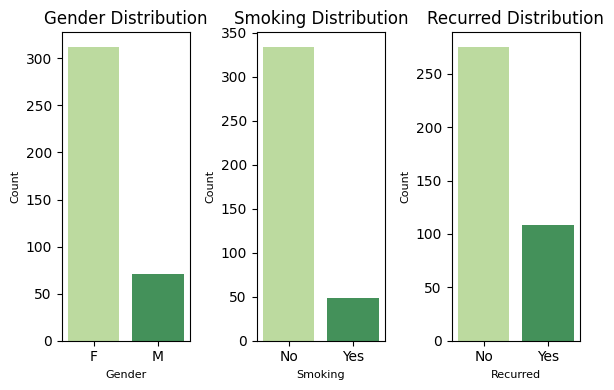

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(6, 4))

# Plotting gender distribution
sns.countplot(x='Gender', data=thyroid_data, palette='YlGn', ax=axes[0])
axes[0].set_title('Gender Distribution', fontsize=12)
axes[0].set_xlabel('Gender', fontsize=8)
axes[0].set_ylabel('Count', fontsize=8)

# Plotting smoking distribution
sns.countplot(x='Smoking', data=thyroid_data, palette='YlGn', ax=axes[1])
axes[1].set_title('Smoking Distribution', fontsize=12)
axes[1].set_xlabel('Smoking', fontsize=8)
axes[1].set_ylabel('Count', fontsize=8)

# Plotting Recurred distribution
sns.countplot(x='Recurred', data=thyroid_data, palette='YlGn', ax=axes[2])
axes[2].set_title('Recurred Distribution', fontsize=12)
axes[2].set_xlabel('Recurred', fontsize=8)
axes[2].set_ylabel('Count', fontsize=8)

plt.tight_layout()  # Adjusting layout to prevent overlap
plt.show()

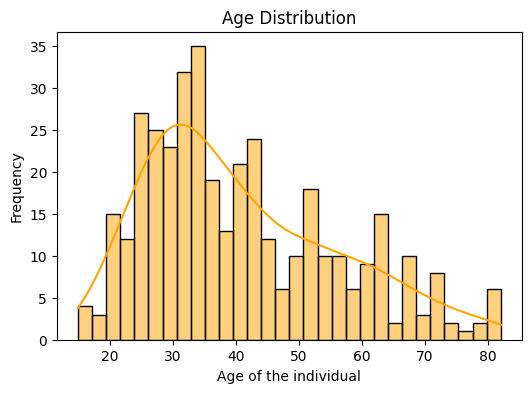

In [ ]:
# To represent the age distribution
plt.figure(figsize=(6, 4))
sns.histplot(thyroid_data['Age'], kde=True, color='orange', bins=30)
plt.xlabel('Age of the individual')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
thyroid_data[['Gender', 'Smoking', ' Smoking History','Radiotherapy History', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T(Tumor)' , 'N(Node)', 'M(Metastasis Staging)', 'Stage', 'Response to treatment', 'Recurred']] = thyroid_data[[ 'Gender', 'Smoking', ' Smoking History', 'Radiotherapy History', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T(Tumor)' , 'N(Node)','M(Metastasis Staging)', 'Stage', 'Response to treatment', 'Recurred']].apply(le.fit_transform)

In [ ]:
thyroid_data.head(10)

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T(Tumor),N(Node),M(Metastasis Staging),Stage,Response to treatment,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
5,52,1,1,0,0,2,1,3,2,0,2,0,0,0,0,2,0
6,41,0,0,1,0,0,4,3,2,1,2,0,0,0,0,1,0
7,46,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
8,51,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
9,40,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0


**Separating Label from Data**

In [ ]:
y = thyroid_data['Recurred']
X = thyroid_data.drop(['Recurred'],axis=1)

In [ ]:
X.columns

Index(['Age', 'Gender', 'Smoking', ' Smoking History', 'Radiotherapy History',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T(Tumor)', 'N(Node)', 'M(Metastasis Staging)',
       'Stage', 'Response to treatment'],
      dtype='object')

In [ ]:
y

,Recurred
0,0
1,0
2,0
3,0
4,0
...,...
378,1
379,1
380,1
381,1


**Splitting the Data into Training and Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)
print("Shape of the y_train", y_train.shape)
print("Shape of the y_test", y_test.shape)

Shape of the X_train (306, 16)
Shape of the X_test (77, 16)
Shape of the y_train (306,)
Shape of the y_test (77,)


In [ ]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Building an Artificial Neural Network Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU

In [ ]:

model = Sequential()
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6870 - loss: 0.6888 - val_accuracy: 0.7532 - val_loss: 0.6260
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7048 - loss: 0.5619 - val_accuracy: 0.8961 - val_loss: 0.3115
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8856 - loss: 0.3576 - val_accuracy: 0.9091 - val_loss: 0.2755
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9295 - loss: 0.2230 - val_accuracy: 0.9351 - val_loss: 0.2376
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9238 - loss: 0.2035 - val_accuracy: 0.9221 - val_loss: 0.2251
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9315 - loss: 0.1957 - val_accuracy: 0.9221 - val_loss: 0.2245
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9147 - loss: 0.1880 - val_accuracy: 0.9351 - val_loss: 0.2200
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.1611 - val_accuracy: 0.9351 - 

**Testing the model**

In [ ]:
score, acc = model.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
print('*'*20)
score, acc = model.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0243e-04 
Train score: 0.00013192658661864698
Train accuracy: 1.0
********************
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9432 - loss: 0.7785 
Test score: 0.5836164355278015
Test accuracy: 0.9610389471054077


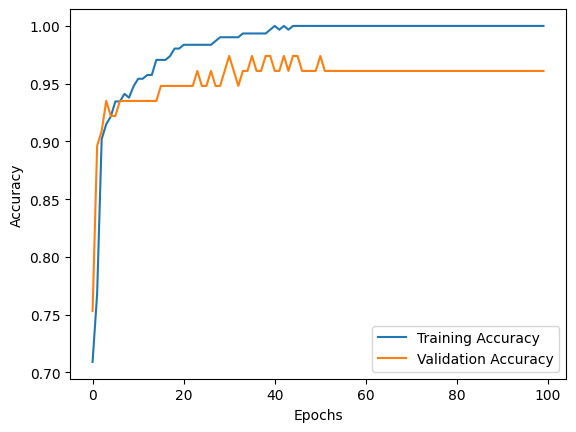

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Metrics Calculation**

In [ ]:
import sklearn.metrics
from math import sqrt
mae_no = sklearn.metrics.mean_absolute_error(y_test,model.predict(X_test))
mse_no = sklearn.metrics.mean_squared_error(y_test,model.predict(X_test))
rms = sqrt(sklearn.metrics.mean_squared_error(y_test,model.predict(X_test)))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
print('Mean Absolute Error     :',mae_no)
print('Mean Square Error       :',mse_no)
print('Root Mean Square Error:', rms)

Mean Absolute Error     : 0.03548185154795647
Mean Square Error       : 0.030208485201001167
Root Mean Square Error: 0.1738058836777431


In [ ]:
# Predict the Test set results
pred = model.predict(X_test)
# Convert predicted probabilities to class labels
y_pred = np.argmax(pred, axis=1)
y_true = y_test
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test Accuracy: 0.7532467532467533

Confusion Matrix:
 [[58  0]
 [19  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        58
           1       0.00      0.00      0.00        19

    accuracy                           0.75        77
   macro avg       0.38      0.50      0.43        77
weighted avg       0.57      0.75      0.65        77



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


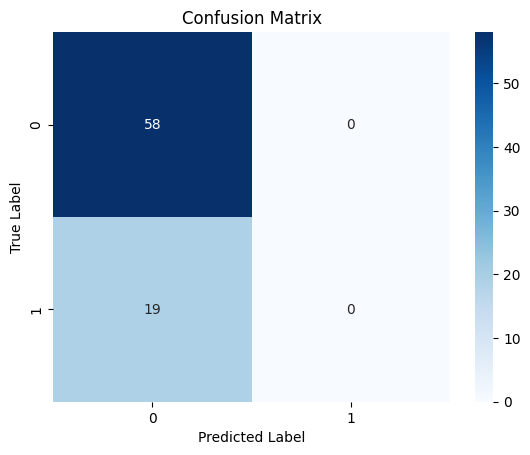

In [ ]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


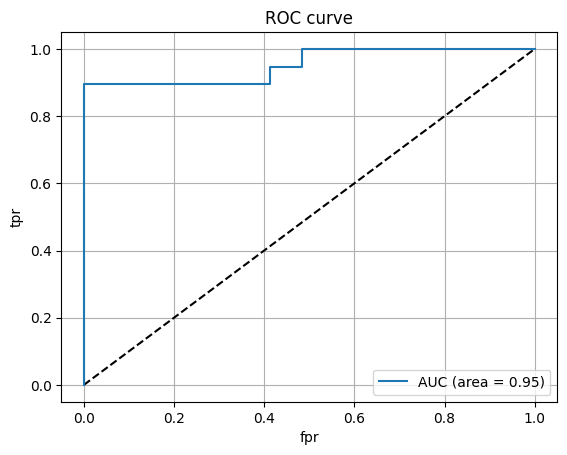

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

np.float64(0.9528130671506352)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = thyroid_data[['Age', 'Gender', 'Smoking', ' Smoking History', 'Radiotherapy History','Thyroid Function', 'Physical Examination',
             'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T(Tumor)', 'N(Node)', 'M(Metastasis Staging)','Stage', 'Response to treatment']]

In [ ]:
y = thyroid_data['Recurred']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (306, 16)
y_train (306,)
X_test (77, 16)
y_test (77,)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[57  1]
 [ 4 15]]


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_LR = logreg_model.predict(X_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Cross Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
X = thyroid_data.drop(columns=['Recurred'])
y = thyroid_data['Recurred']
model = LogisticRegression()

In [ ]:
# Stratified KFold cross-validation with 5 folds
# (This ensures that each fold has approximately same proportion of target classes as the entire dataset)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

Fold 1: Accuracy = 0.9221
Fold 2: Accuracy = 0.9091
Fold 3: Accuracy = 0.8961
Fold 4: Accuracy = 0.8947
Fold 5: Accuracy = 0.9079


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# mean and standard deviation of accuracy scores across all folds
print(f"Mean: {accuracy_scores.mean():.4f}")
print(f"Standard Deviation: {accuracy_scores.std():.4f}")

Mean: 0.9060
Standard Deviation: 0.0100


**Architecture Generator**

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [ ]:
model = Sequential()
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


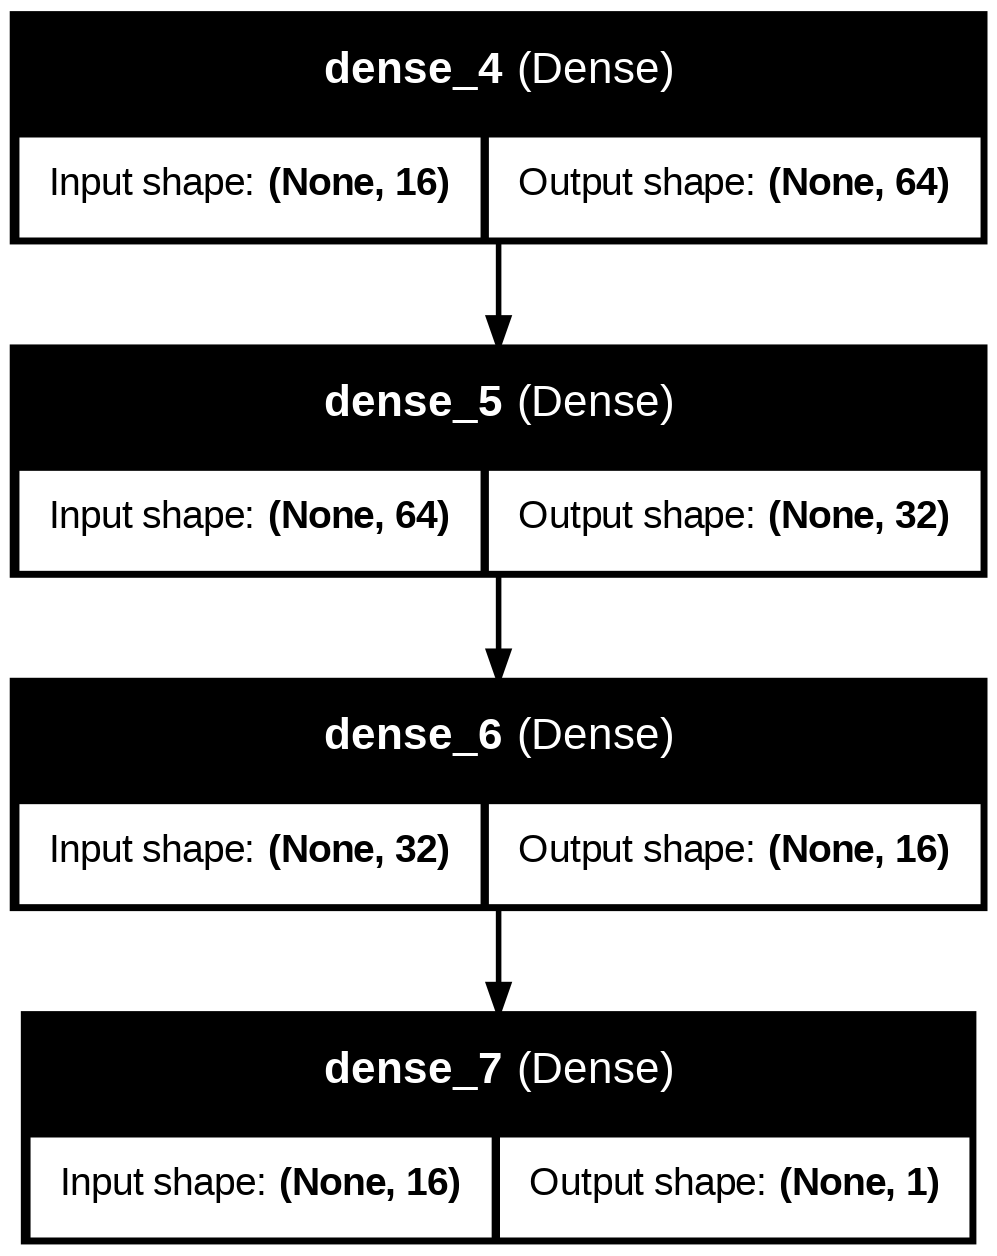

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

**Exploratory Data Analysis (EDA)**

In [ ]:
print(thyroid_data.shape)
print(thyroid_data.info())
print(thyroid_data.dtypes)

(383, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    383 non-null    int64
 1   Gender                 383 non-null    int64
 2   Smoking                383 non-null    int64
 3    Smoking History       383 non-null    int64
 4   Radiotherapy History   383 non-null    int64
 5   Thyroid Function       383 non-null    int64
 6   Physical Examination   383 non-null    int64
 7   Adenopathy             383 non-null    int64
 8   Pathology              383 non-null    int64
 9   Focality               383 non-null    int64
 10  Risk                   383 non-null    int64
 11  T(Tumor)               383 non-null    int64
 12  N(Node)                383 non-null    int64
 13  M(Metastasis Staging)  383 non-null    int64
 14  Stage                  383 non-null    int64
 15  Response to treatment  383 non

In [ ]:
print(thyroid_data.describe())

              Age      Gender     Smoking   Smoking History  \
count  383.000000  383.000000  383.000000        383.000000   
mean    40.866841    0.185379    0.127937          0.073107   
std     15.134494    0.389113    0.334457          0.260653   
min     15.000000    0.000000    0.000000          0.000000   
25%     29.000000    0.000000    0.000000          0.000000   
50%     37.000000    0.000000    0.000000          0.000000   
75%     51.000000    0.000000    0.000000          0.000000   
max     82.000000    1.000000    1.000000          1.000000   

       Radiotherapy History  Thyroid Function  Physical Examination  \
count            383.000000        383.000000            383.000000   
mean               0.018277          1.950392              2.561358   
std                0.134126          0.630917              1.350110   
min                0.000000          0.000000              0.000000   
25%                0.000000          2.000000              1.000000   
50%   

In [ ]:
print(thyroid_data['Recurred'].value_counts())

Recurred
0    275
1    108
Name: count, dtype: int64


<Axes: xlabel='Recurred', ylabel='count'>

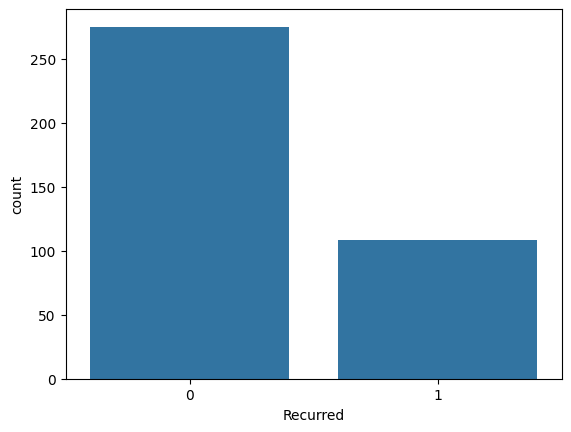

In [ ]:
import seaborn as sns
sns.countplot(x='Recurred', data=thyroid_data)

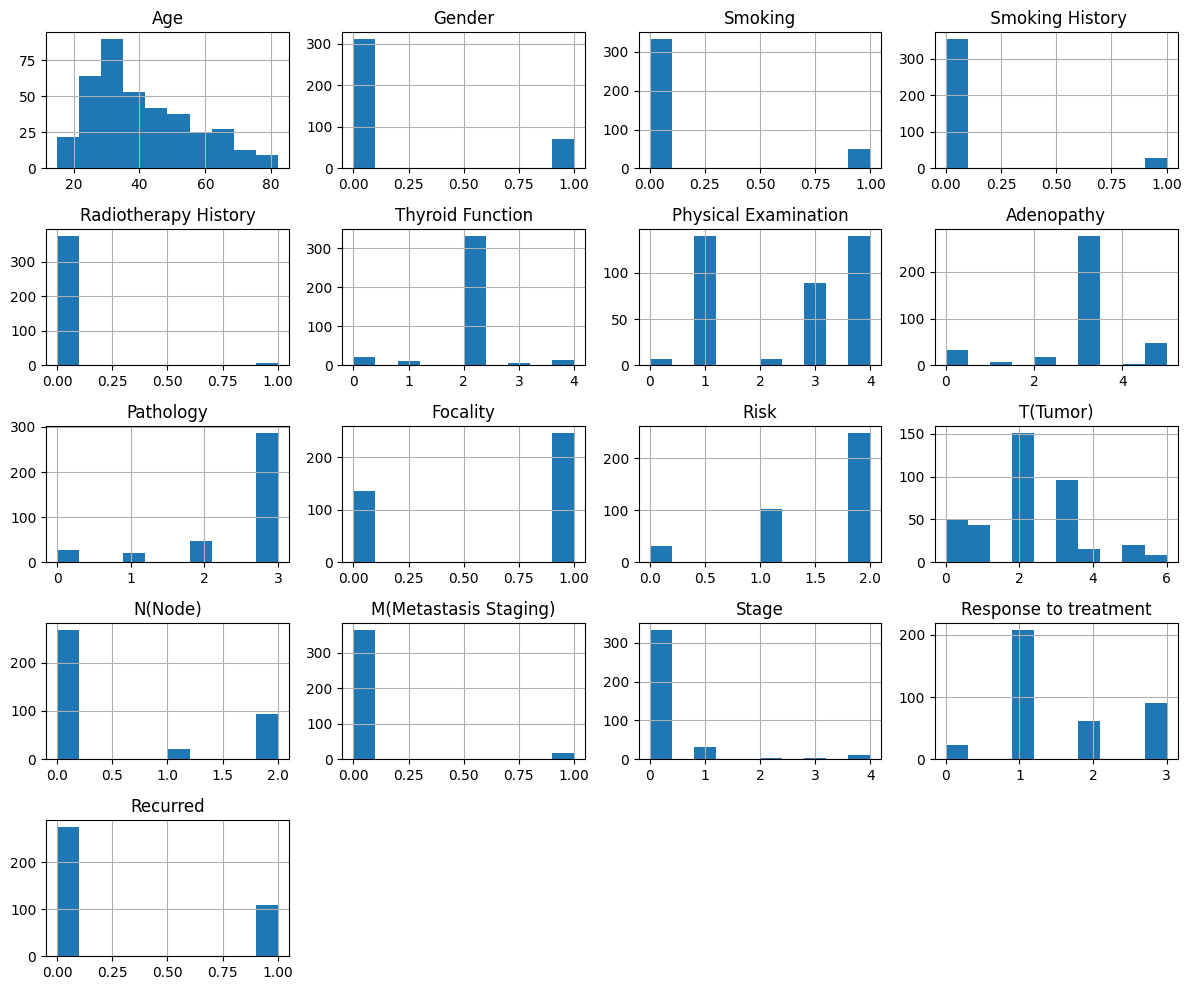

In [ ]:
import matplotlib.pyplot as plt
thyroid_data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

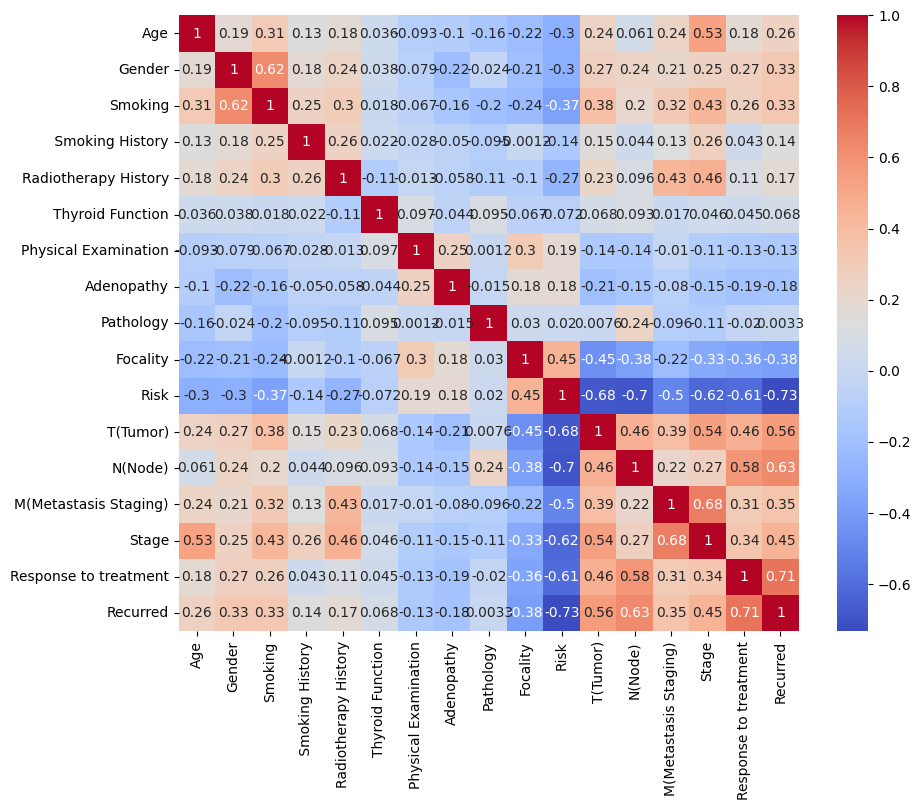

In [ ]:
corr_matrix = thyroid_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

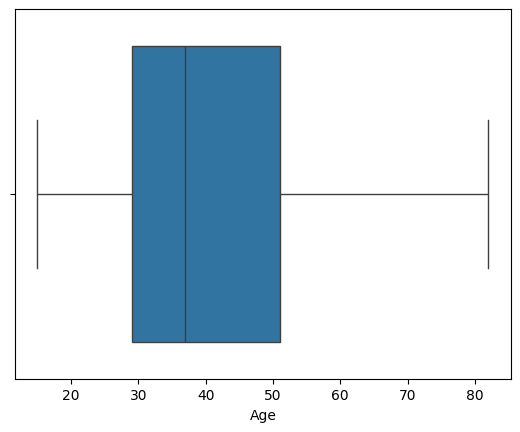

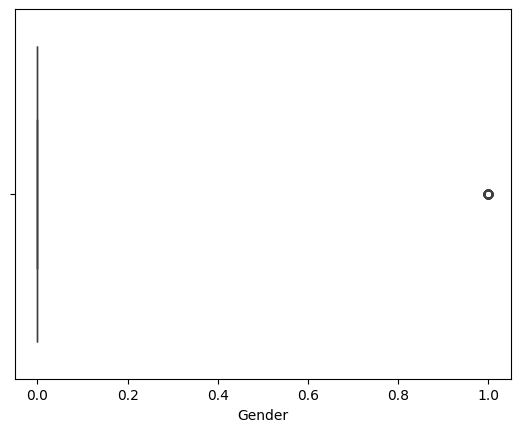

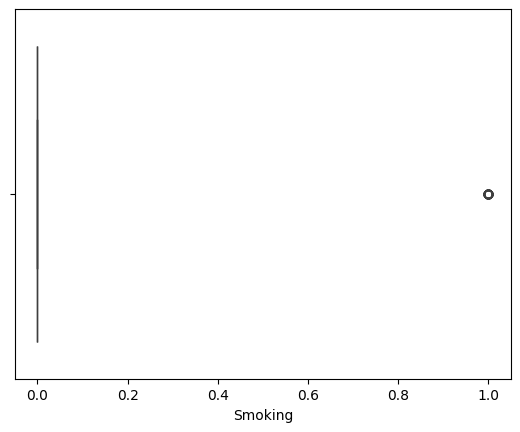

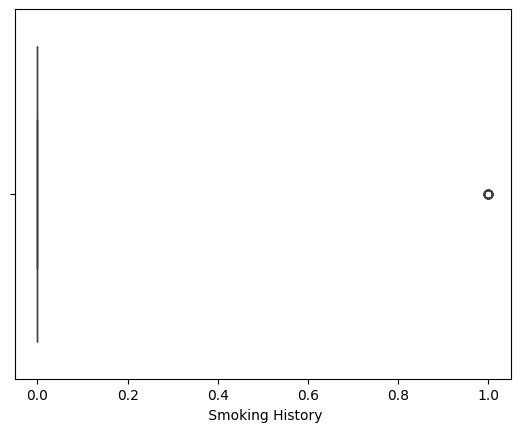

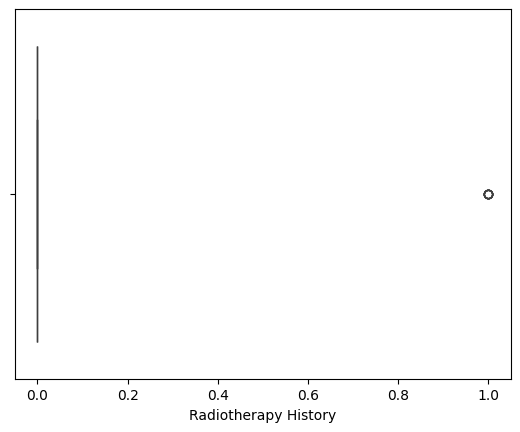

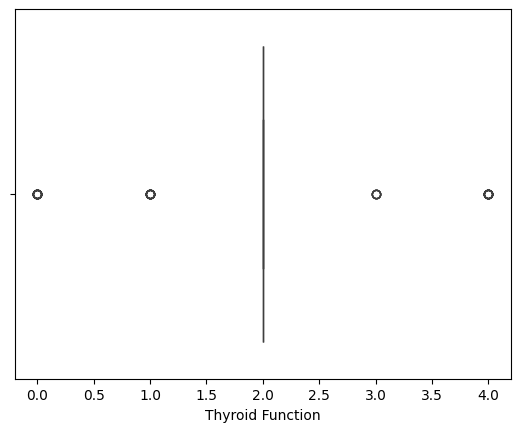

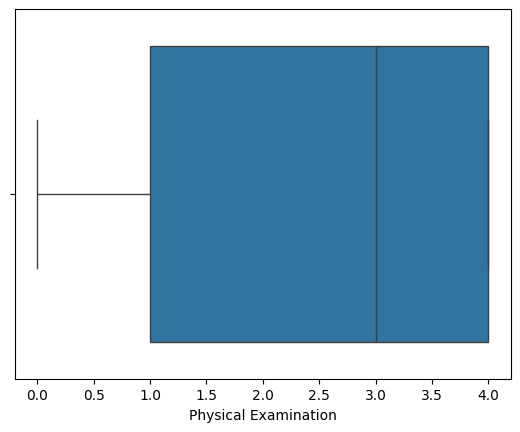

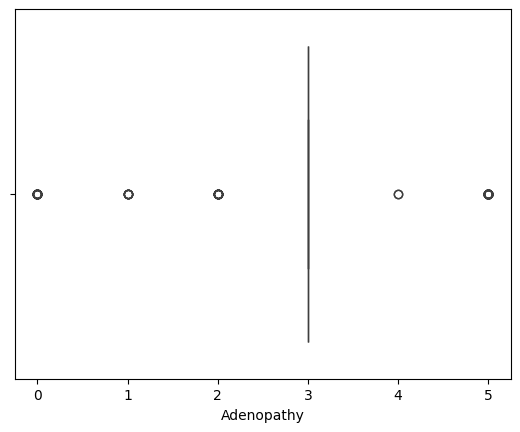

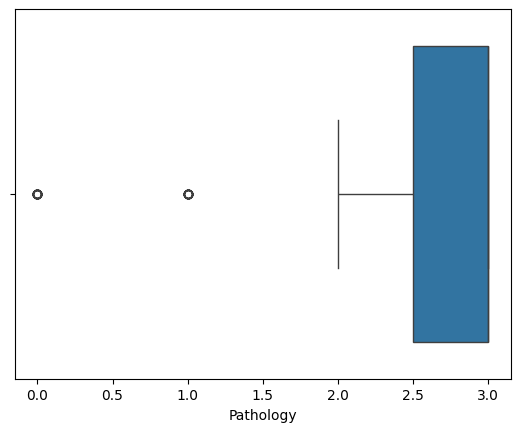

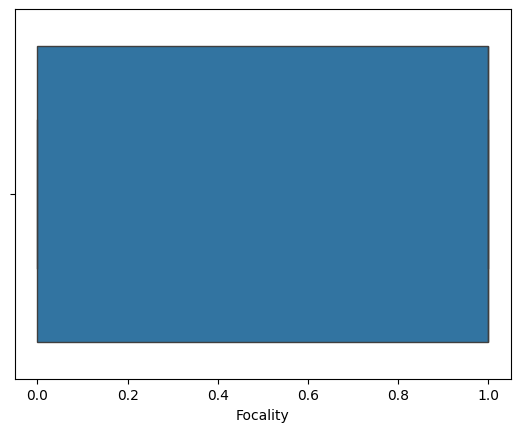

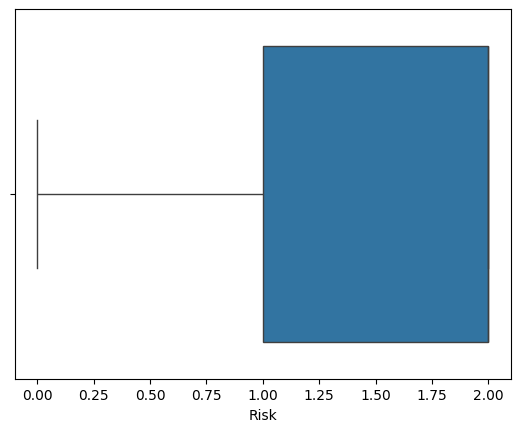

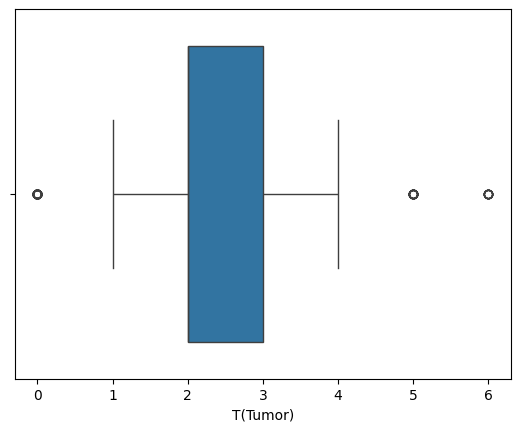

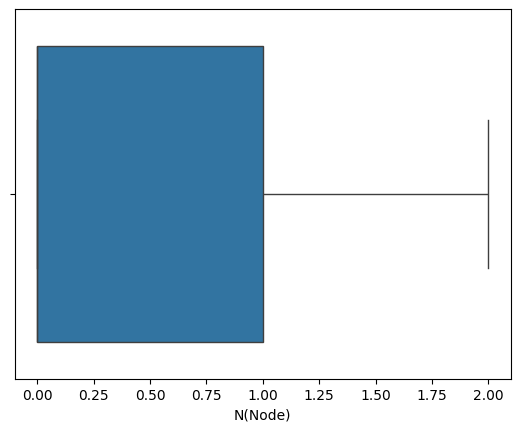

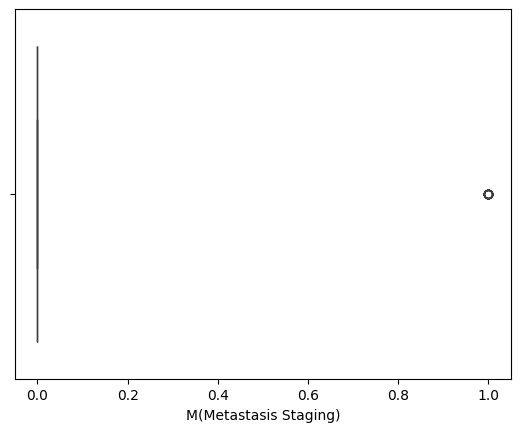

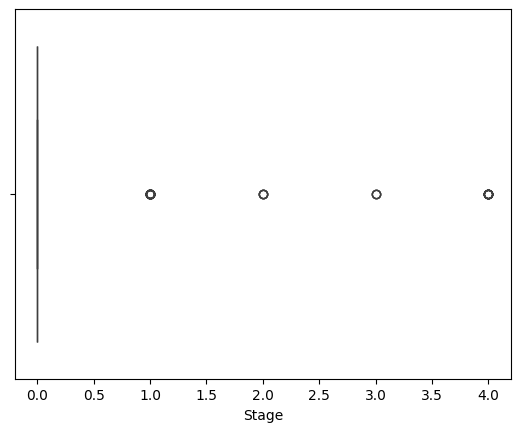

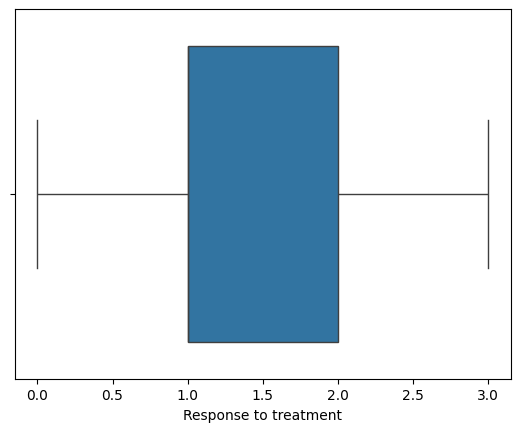

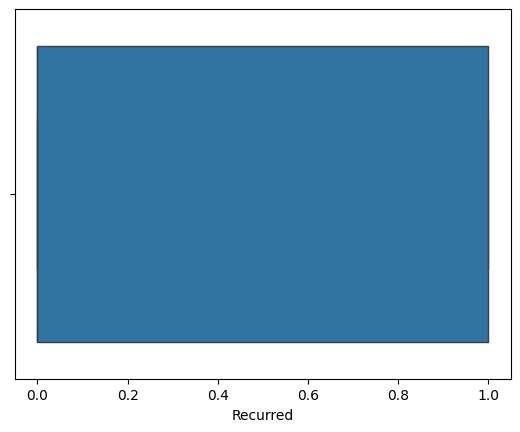

In [ ]:
# Outlier Detection
# Boxplot for each feature
for col in thyroid_data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=thyroid_data[col])
    plt.show()

In [ ]:
# Import all libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# Dictionary to store accuracy
accuracy_results = {}

In [ ]:
# Train and Evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)  # you already have X_train_scaled, y_train
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    disp.ax_.set_title(f"{name} Confusion Matrix")
    plt.show()

# Display all model accuracies
print("\nModel Accuracies:")
for model_name, acc in accuracy_results.items():
    print(f"{model_name}: {acc:.4f}")

Training Logistic Regression...


NameError: name 'X_train_scaled' is not defined

In [ ]:
##########

In [ ]:
###############

In [ ]:
############